In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist, euclidean
from fastdtw import fastdtw

In [2]:
baseload = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad3.csv', header=None)
baseload.columns = range(1, baseload.shape[1] + 1)
baseload.index = range(1, len(baseload) + 1)
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

Euclidean distance

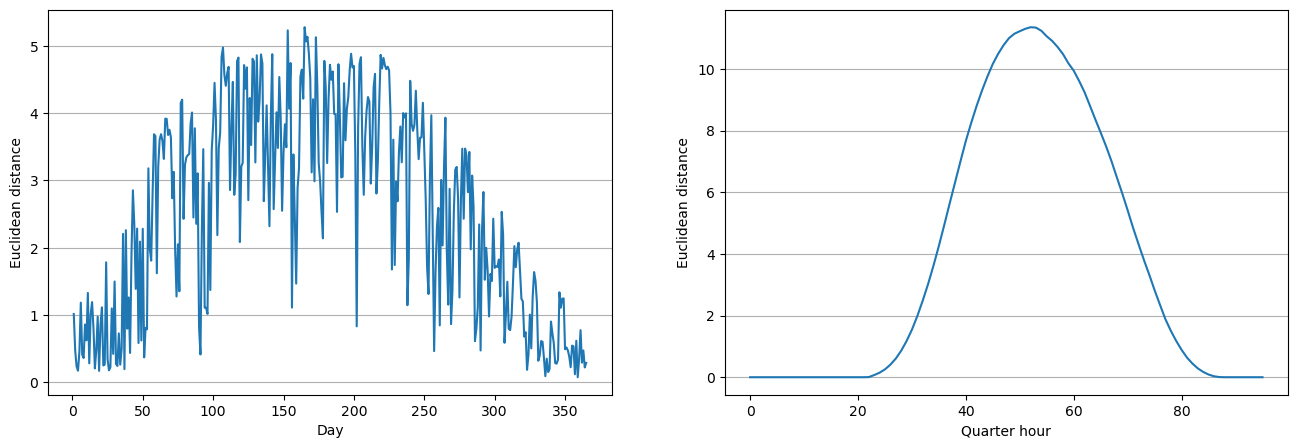

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
net_consumption = baseload - solargen

column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
column_distances = pd.Series(column_distances)

row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
row_distances = pd.Series(row_distances)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.figure(figsize=(10, 6))

axs[0].plot(column_distances)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))

axs[1].plot(row_distances)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Euclidean distance')
axs[1].grid(axis='y')

plt.show()


kWp sensitivity

In [4]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

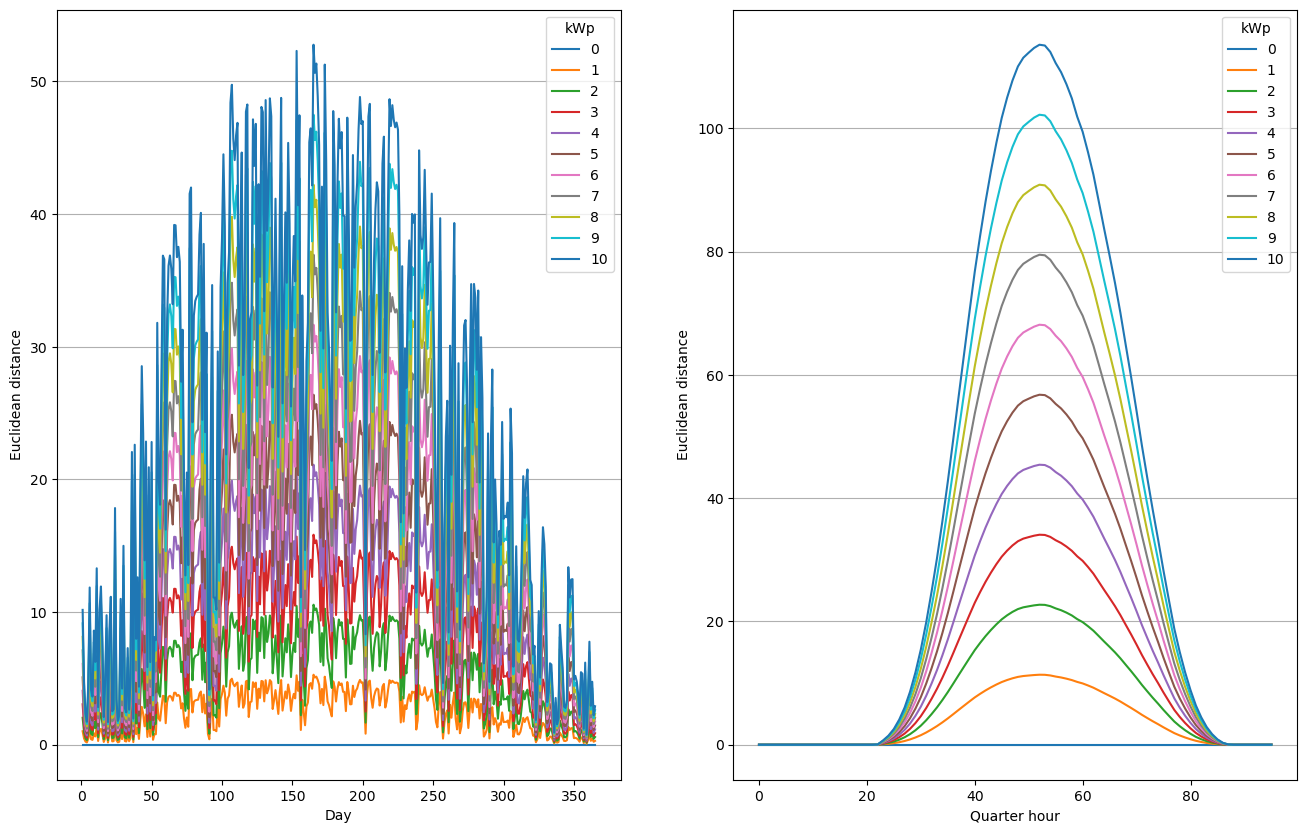

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [5]:
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and Euclidean distance for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
    column_distances = pd.Series(column_distances)

    row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
    row_distances = pd.Series(row_distances)
    
    results_year[len(results_year.columns)] = column_distances
    results_day[len(results_day.columns)] = row_distances

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Euclidean distance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

EV

C:\Users\fiasa\AppData\Local\Temp\ipykernel_27524\2353169876.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend(title='kWp')
C:\Users\fiasa\AppData\Local\Temp\ipykernel_27524\2353169876.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(title='kWp')


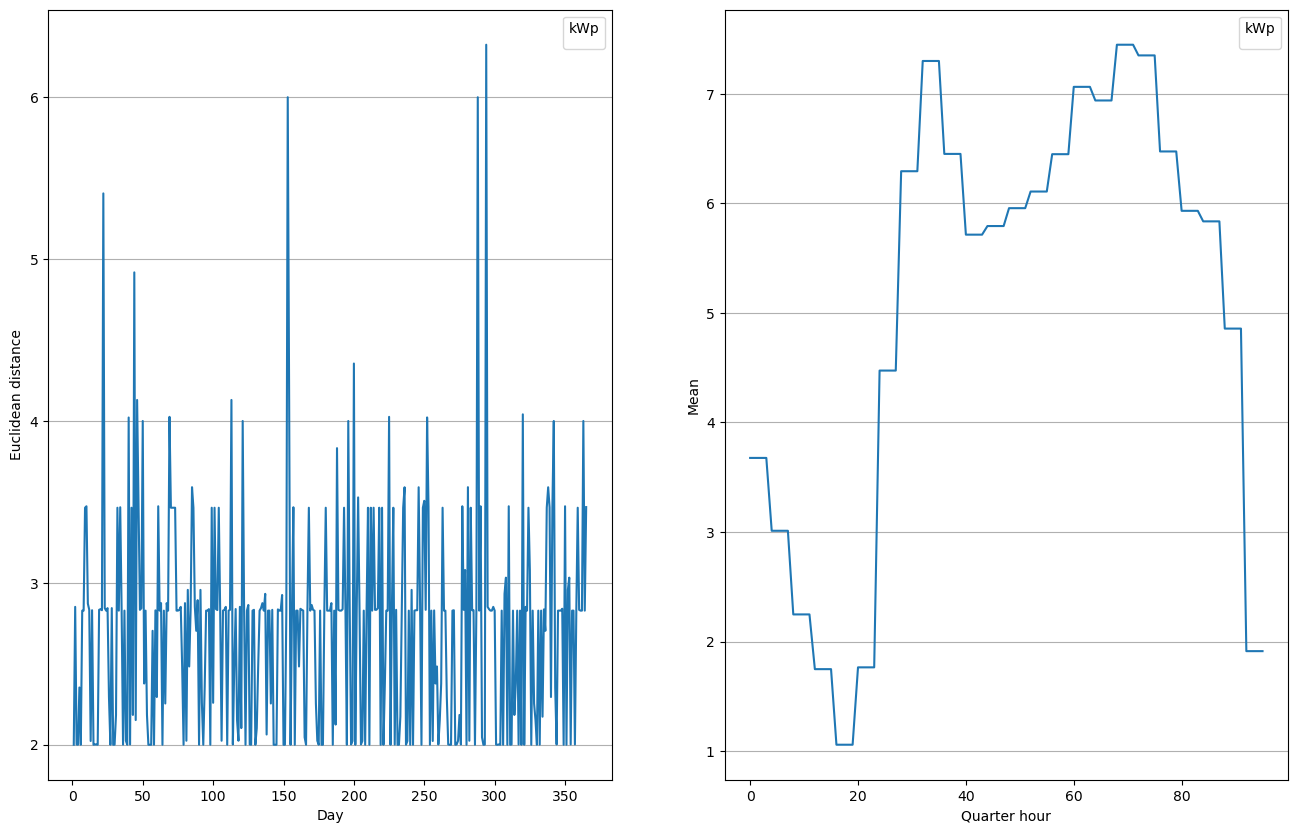

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [6]:
chargingprofile = pd.read_csv('./data/yearly_charging_profile.csv', header=None)
# Drop the first row and column (headers)
chargingprofile = chargingprofile.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile.index = range(1, len(chargingprofile) + 1)
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
# Apply normalization
chargingprofile= min_max_normalize(chargingprofile)


net_consumption = baseload + chargingprofile

column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
column_distances = pd.Series(column_distances)

row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
row_distances = pd.Series(row_distances)

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))

axs[0].plot(column_distances)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))

axs[1].plot(row_distances)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Mean')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()


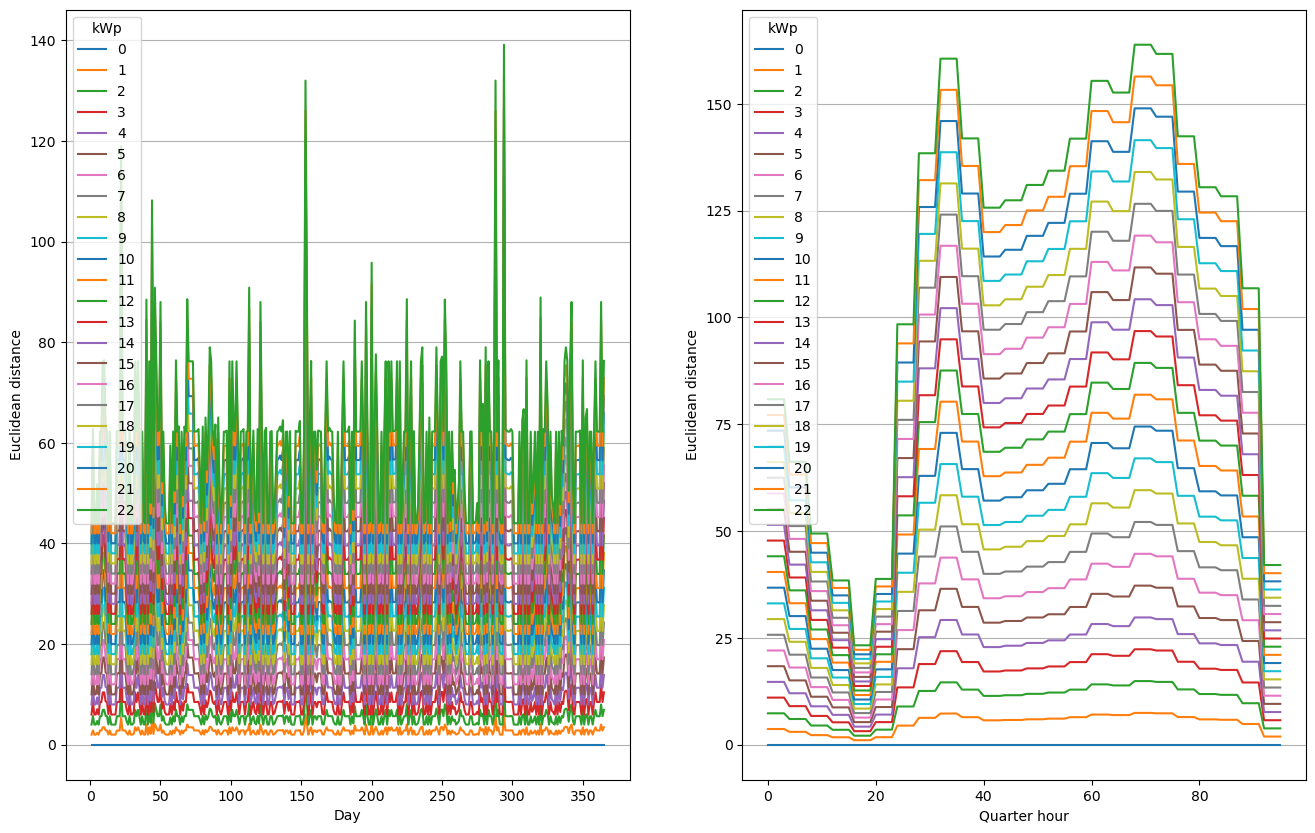

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [7]:
kw_values = np.arange(0, 23, 1) 

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and Euclidean distance for each kWp value
for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
    column_distances = pd.Series(column_distances)

    row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
    row_distances = pd.Series(row_distances)
    
    results_year[len(results_year.columns)] = column_distances
    results_day[len(results_day.columns)] = row_distances

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Euclidean distance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Spearmans Rank

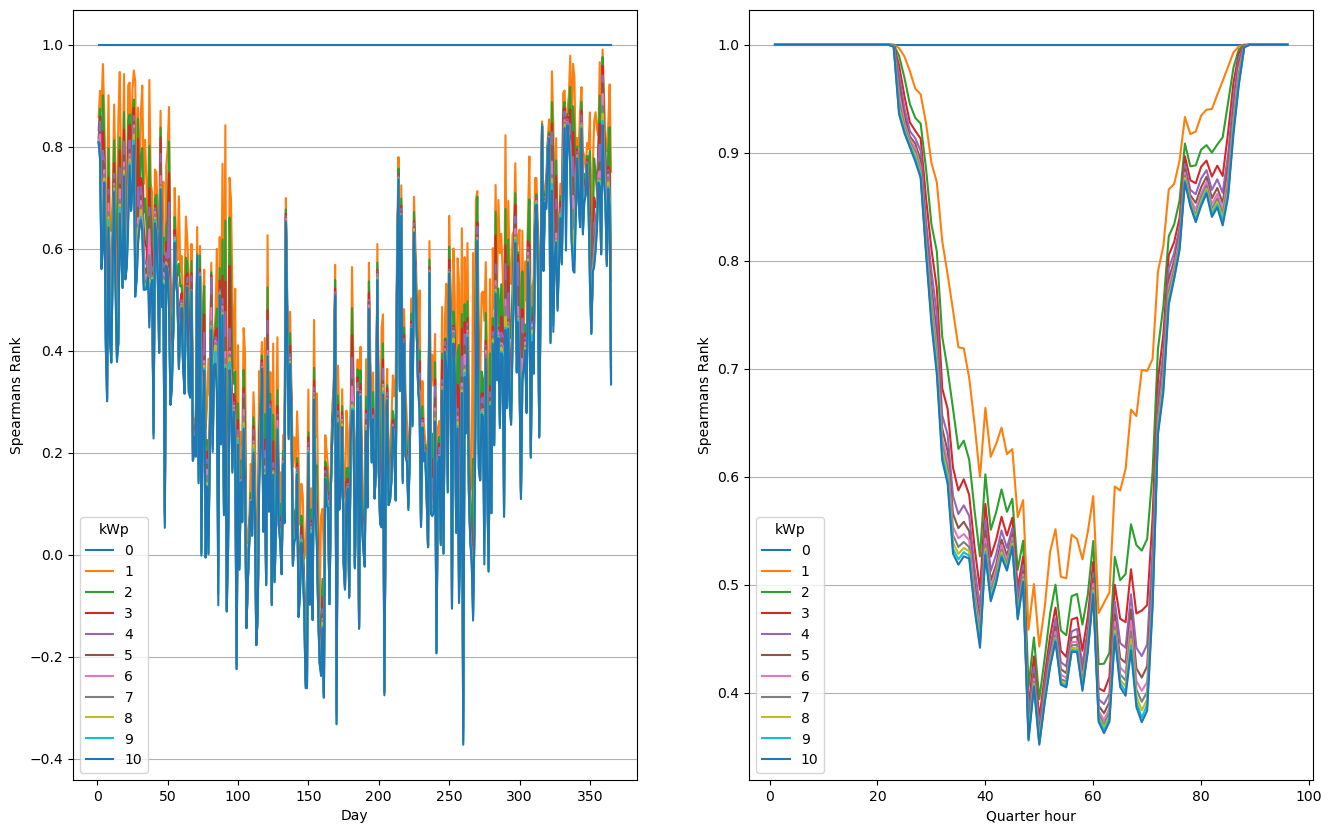

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
from scipy import stats
results_year = pd.DataFrame()
results_day = pd.DataFrame()
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)
  
    # Calculate column-wise Spearman correlation
    column_correlations = {col: stats.spearmanr(baseload[col], net_consumption[col])[0] for col in baseload.columns}
    column_correlations = pd.Series(column_correlations)

    # Calculate row-wise Spearman correlation
    baseload_T = baseload.T  # Transpose to access rows
    net_consumption_T = net_consumption.T

    row_correlations = {}
    for idx in baseload_T.columns:  # Iterate over rows
        row_correlations[idx] = stats.spearmanr(baseload_T[idx], net_consumption_T[idx])[0]
    row_correlations = pd.Series(row_correlations)

    # Store results in DataFrames
    results_year[len(results_year.columns)] = column_correlations
    results_day[len(results_day.columns)] = row_correlations

    # print("Iteration", kwp)
    

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Spearmans Rank')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Spearmans Rank')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()
    

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22


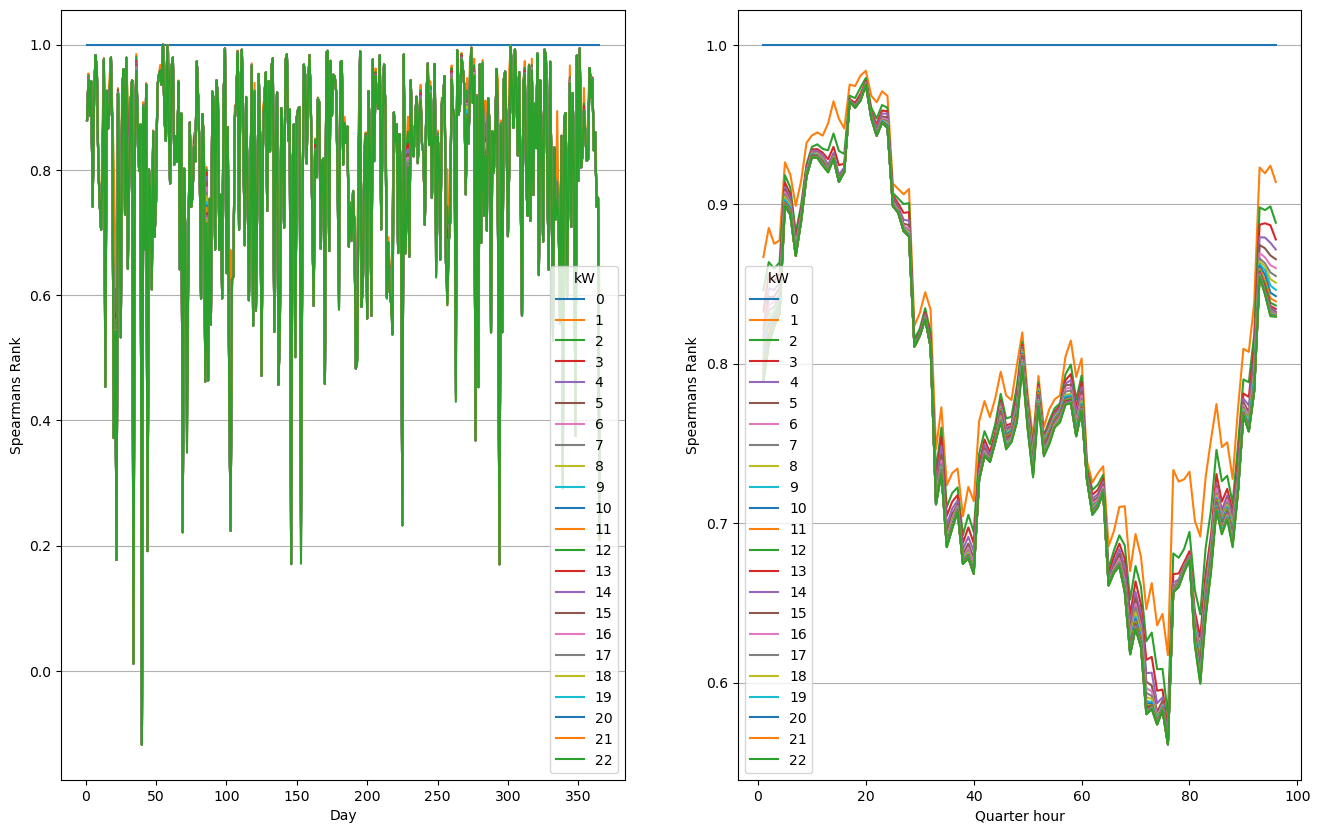

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [9]:
from scipy import stats

kw_values = np.arange(0, 23, 1) 

results_year = pd.DataFrame()
results_day = pd.DataFrame()

for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)
  
    # Calculate column-wise Spearman correlation
    column_correlations = {col: stats.spearmanr(baseload[col], net_consumption[col])[0] for col in baseload.columns}
    column_correlations = pd.Series(column_correlations)

    # Calculate row-wise Spearman correlation
    baseload_T = baseload.T  # Transpose to access rows
    net_consumption_T = net_consumption.T

    row_correlations = {}
    for idx in baseload_T.columns:  # Iterate over rows
        row_correlations[idx] = stats.spearmanr(baseload_T[idx], net_consumption_T[idx])[0]
    row_correlations = pd.Series(row_correlations)

    # Store results in DataFrames
    results_year[len(results_year.columns)] = column_correlations
    results_day[len(results_day.columns)] = row_correlations

    print("Iteration", kw)
    

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Spearmans Rank')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Spearmans Rank')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()

Dynamic time warping

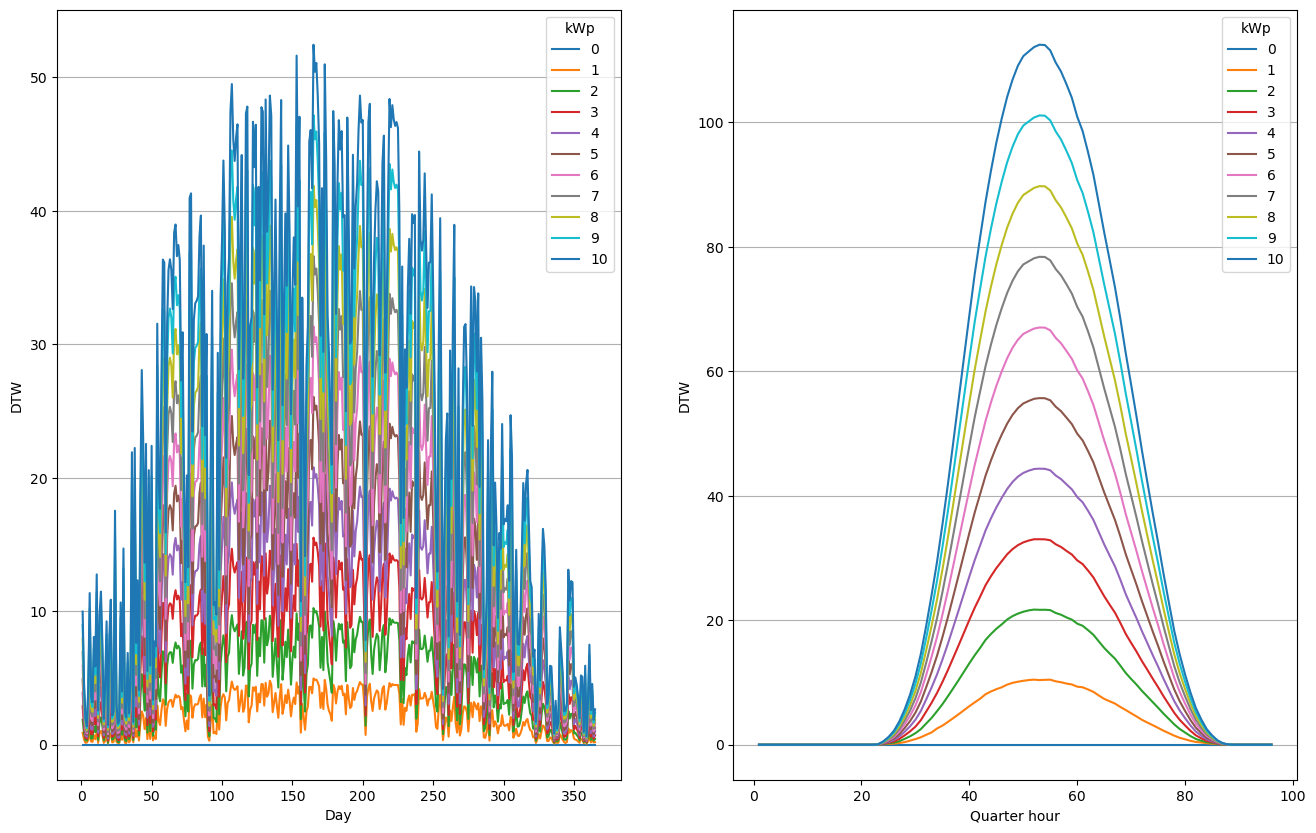

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
from dtaidistance import dtw

results_year = pd.DataFrame()
results_day = pd.DataFrame()
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    column_correlations = {}
    for col in baseload.columns:
        baseload_values = baseload[col].to_numpy()
        net_consumption_values = net_consumption[col].to_numpy()
        distance = dtw.distance_fast(baseload_values, net_consumption_values)
        column_correlations[col] = distance
    column_correlations = pd.Series(column_correlations)
    # Calculate row-wise Spearman correlation
    baseload_T = baseload.T  # Transpose to access rows
    net_consumption_T = net_consumption.T

    row_correlations = {}
    for idx in baseload_T.columns:  # Iterate over rows
        baseload_values = baseload_T[idx].to_numpy()
        net_consumption_values = net_consumption_T[idx].to_numpy()
        distance = dtw.distance_fast(baseload_values, net_consumption_values)
        row_correlations[idx] = distance
    row_correlations = pd.Series(row_correlations)

    # Store results in DataFrames
    results_year[len(results_year.columns)] = column_correlations
    results_day[len(results_day.columns)] = row_correlations

    # print("Iteration", kwp)
    

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('DTW')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('DTW')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

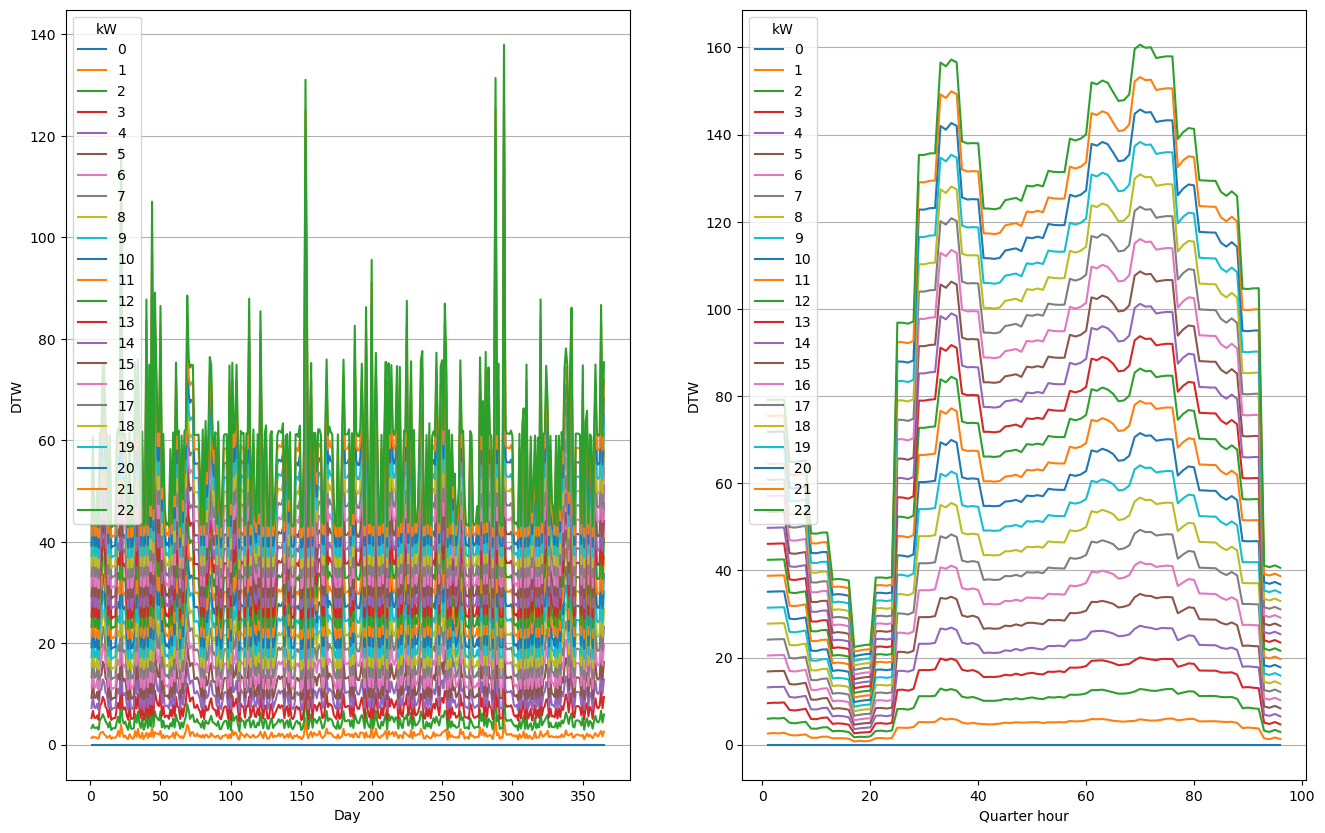

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
from dtaidistance import dtw

results_year = pd.DataFrame()
results_day = pd.DataFrame()
kw_values = np.arange(0, 23, 1) 

for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    # Calculate column-wise Spearman correlation
    # Initialize an empty dictionary to store the correlations
    column_correlations = {}
    for col in baseload.columns:
        baseload_values = baseload[col].to_numpy()
        net_consumption_values = net_consumption[col].to_numpy()
        distance = dtw.distance_fast(baseload_values, net_consumption_values)
        column_correlations[col] = distance
    column_correlations = pd.Series(column_correlations)
    # Calculate row-wise Spearman correlation
    baseload_T = baseload.T  # Transpose to access rows
    net_consumption_T = net_consumption.T

    row_correlations = {}
    for idx in baseload_T.columns:  # Iterate over rows
        baseload_values = baseload_T[idx].to_numpy()
        net_consumption_values = net_consumption_T[idx].to_numpy()
        distance = dtw.distance_fast(baseload_values, net_consumption_values)
        row_correlations[idx] = distance
    row_correlations = pd.Series(row_correlations)

    # Store results in DataFrames
    results_year[len(results_year.columns)] = column_correlations
    results_day[len(results_day.columns)] = row_correlations

    

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('DTW')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('DTW')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()